<a href="https://colab.research.google.com/github/Sriyoshija/task6/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.78
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  4  9]]


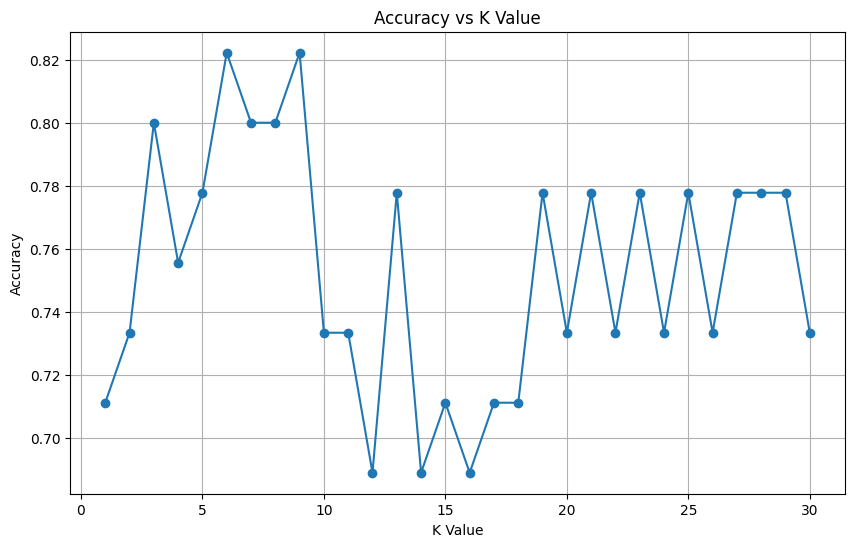

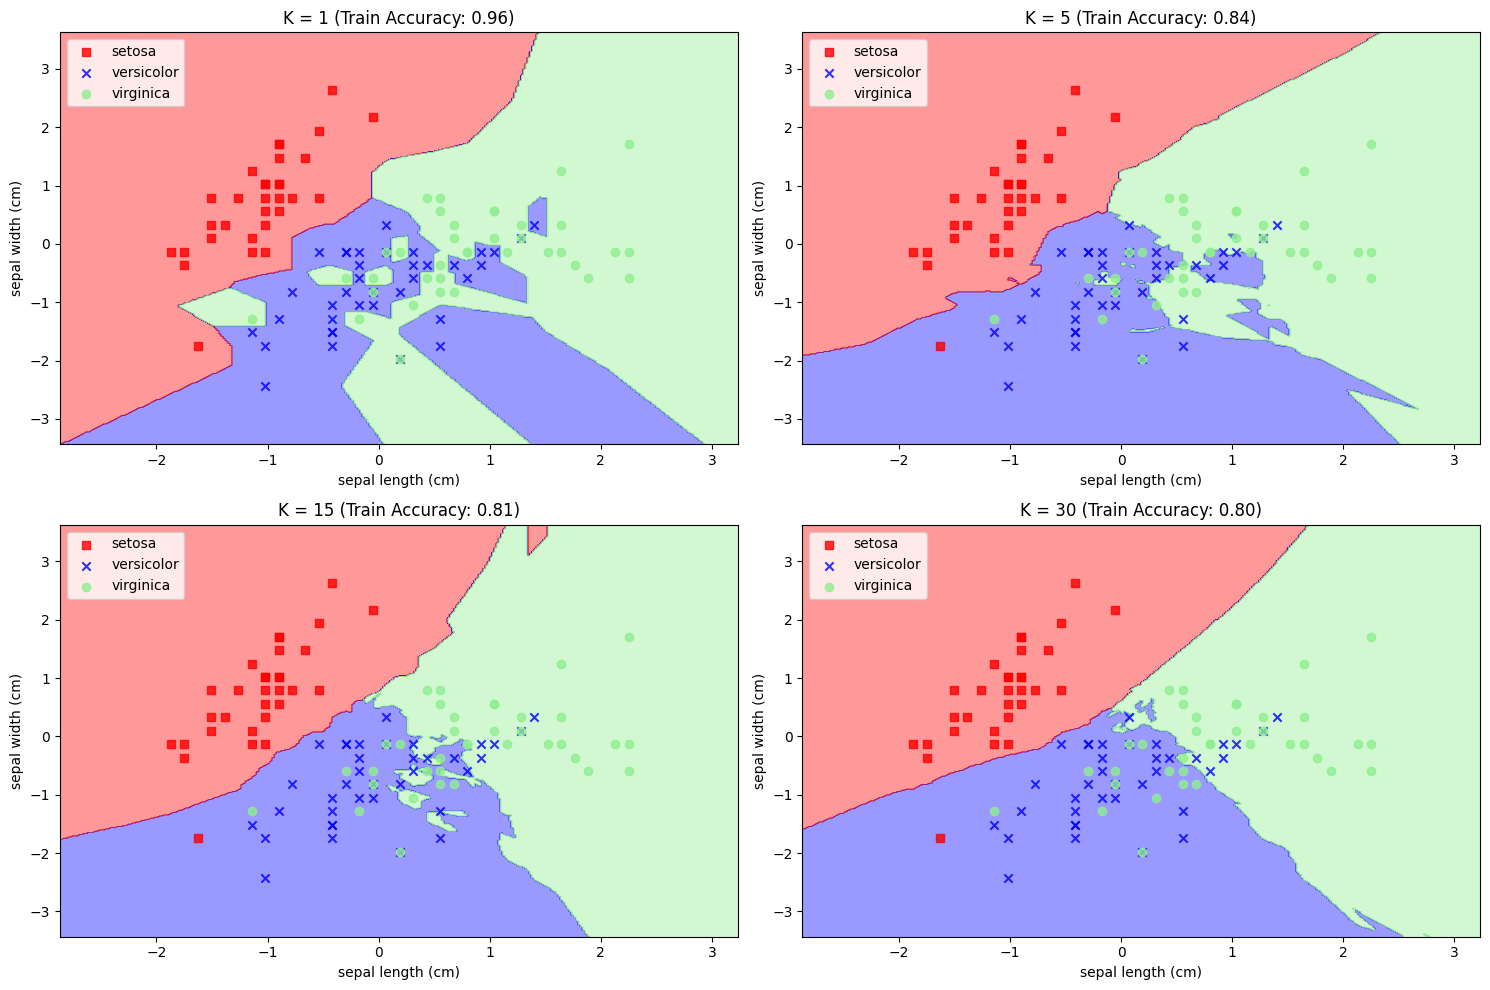

In [12]:
from pickle import FALSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


USE_BUILTIN_DATA = FALSE
CSV_FILE_PATH = "/content/Iris.csv"
TARGET_COLUMN = "target"

if USE_BUILTIN_DATA:
    iris = load_iris()
    X = iris.data[:, :2]
    y = iris.target
    feature_names = iris.feature_names[:2]
    class_names = iris.target_names
else:
    data = pd.read_csv(CSV_FILE_PATH)
    X = data.drop(TARGET_COLUMN, axis=1).values
    y = data[TARGET_COLUMN].values
    X = X[:, :2]
    feature_names = data.columns.drop(TARGET_COLUMN)[:2]
    class_names = np.unique(y)

#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

#Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#With different K values
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    acc = knn_temp.score(X_test, y_test)
    accuracies.append(acc)

#accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)
plt.savefig('knn_accuracy_plot.png')
plt.show()

#DECISION BOUNDARY VISUALIZATION
def plot_decision_boundaries(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'purple', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'{class_names[cl]}' if USE_BUILTIN_DATA else f'Class {cl}'
        )
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(loc='upper left')

#Visualize boundaries for different K values
plt.figure(figsize=(15, 10))
for i, k in enumerate([1, 5, 15, 30]):
    plt.subplot(2, 2, i+1)
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    plot_decision_boundaries(X_train, y_train, knn_temp)
    plt.title(f'K = {k} (Train Accuracy: {knn_temp.score(X_train, y_train):.2f})')
plt.tight_layout()
plt.savefig('knn_decision_boundaries.png')
plt.show()